<h1> Applying KNN Classifier <h1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

<h2> Loading Data <h2>

In [9]:
arr2= np.load('data_array_non_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))



[[40000000 11.80967 159.0 ... 0 0 0]
 [46630000 7.7534160000000005 126.0 ... 0 0 0]
 [30000000 21.533072 136.0 ... 0 0 0]
 ...
 [55000000 11.887779 105.0 ... 0 0 0]
 [10000000 2.7722689999999997 127.0 ... 1 0 0]
 [9000000 13.305564000000002 100.0 ... 0 0 0]] ['Good' 'Average' 'Good' ... 'Average' 'Average' 'Bad']
5253 5253 1314 1314


<h2> Default KNN <h2>

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train); #train the classifier

print ('Testing score: ',clf1.score (X_test, y_test)) # print the testing score(accuracy)
print ('Training Score: ',clf1.score (X_train, y_train)) # print the trainig score(accuracy)
y_pred =clf1.predict(X_test)
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))



#lets print classification Report
print('Classification Report: \n',classification_report(y_test, y_pred))

#Lets print confision matrix
print('Confusion Matrix values \n',confusion_matrix(y_test, y_pred))

Testing score:  0.7785388127853882
Training Score:  0.8185798591281173
F1 Score: 0.7294736058644629
Classification Report: 
               precision    recall  f1-score   support

     Average       0.81      0.95      0.87      1043
         Bad       0.38      0.20      0.26       179
        Good       0.25      0.01      0.02        92

    accuracy                           0.78      1314
   macro avg       0.48      0.38      0.38      1314
weighted avg       0.71      0.78      0.73      1314

Confusion Matrix values 
 [[987  53   3]
 [144  35   0]
 [ 88   3   1]]


<h2> Determining best n_neighbors <h2>

In [13]:
test_score = []
train_score = []
n_neighbors = []
f1_scores = []

for i in range(2,151):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    n_neighbors.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(n_neighbors,test_score,train_score,f1_scores)),columns = ['n_neighbors','test_score','train_score','f1_scores'])

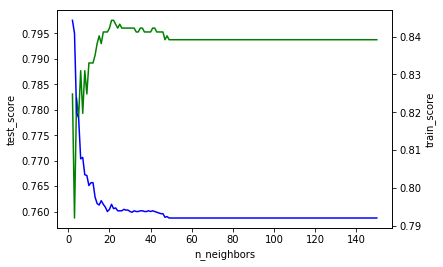

In [14]:
#Plot train and test score as n_neighbors needed to split increases
sns.lineplot(x=df['n_neighbors'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['n_neighbors'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

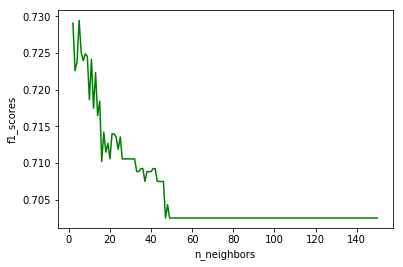

In [15]:
sns.lineplot(x= df['n_neighbors'],y=df['f1_scores'], color="g")
plt.show()

In [16]:
#Based on the f1_score, lets find the best value for n_neighbors
print("Best Row based on f1_score")
maxF1Score = df['f1_scores'].idxmax()
print(df.iloc[maxF1Score])
best_min_samples_split = df['n_neighbors'].values[maxF1Score]

Best Row based on f1_score
n_neighbors    5.000000
test_score     0.778539
train_score    0.818580
f1_scores      0.729474
Name: 3, dtype: float64


<h2> Determining best algorithm to compute nearest neighbour <h2>

In [21]:
list_algos = ['auto', 'ball_tree', 'kd_tree', 'brute']

test_score = []
train_score = []
f1_scores = []

for algo in list_algos:
    clf = KNeighborsClassifier(algorithm = algo,n_neighbors=5)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(list_algos,test_score,train_score,f1_scores)),columns = ['list_algos','test_score','train_score','f1_scores'])

In [23]:
print(df)

  list_algos  test_score  train_score  f1_scores
0       auto    0.778539      0.81858   0.729474
1  ball_tree    0.778539      0.81858   0.729474
2    kd_tree    0.778539      0.81858   0.729474
3      brute    0.777778      0.81858   0.728286


As we can see from the results above, the default 'auto' method works as good as ball_tree and kd_tree. Hence, we can leave it at auto.

<h2> Determining best leaf_size <h2>

In [29]:
test_score = []
train_score = []
leaf_size = []
f1_scores = []

for i in range(2,151):
    clf = KNeighborsClassifier(leaf_size = i,n_neighbors=5)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    leaf_size.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(leaf_size,test_score,train_score,f1_scores)),columns = ['leaf_size','test_score','train_score','f1_scores'])

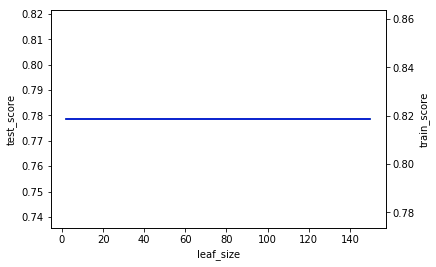

In [30]:
#Plot train and test score as leaf_size needed to split increases
sns.lineplot(x=df['leaf_size'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['leaf_size'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

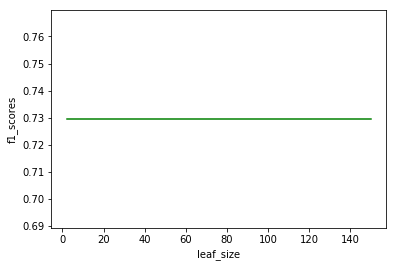

In [31]:
sns.lineplot(x= df['leaf_size'],y=df['f1_scores'], color="g")
plt.show()

As seen above, changing the leaf size has no effect on the F1 measure, so we will keep default.